In [1]:
print("Hello world")
print("_Let's try to implement the finite difference method for the solution to the Schrödinger equation in one dimension._")

Hello world
_Let's try to implement the finite difference method for the solution to the Schrödinger equation in one dimension._


In [11]:
import numpy as np
from scipy.interpolate import interp1d
import fractions
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter


In [13]:
def simulate_wave_packet(potential, xrange_, tstep_, tMax_, p0_, x0_, width_):
    xrange = xrange_
    tstep = tstep_
    tMax = tMax_
    p0 = p0_
    x0 = x0_
    width = width_

    # Variable Initialization
    xstep = 1
    dx = xstep
    xMax = int(np.floor((xrange[1] - xrange[0]) / xstep))
    xvals = np.linspace(xrange[0], xrange[1], xMax)  #Last 2lines calculates the values (xMax) based on the specified range and step size.
                                                     #Then, it generates an array of equidistant x values within the specified range using the np.linspace function.
                                                     #(I didn't know np.linespace and np.floor)
    dt = tstep
    tvals = np.linspace(0, tMax, int(tMax/tstep)) #I'm thinking dt as an infinitesimal increment.So I add it? (In Badger notebook it was at tMax)

    v = potential(xvals)

    a = width
    psivals = np.zeros((len(tvals), len(xvals)), dtype = np.complex128)
    psivals[0] = np.exp(-(xvals - x0)**2 / a**2 + 1j * p0 * xvals)

    psiLast = np.zeros_like(xvals, dtype=np.complex128)
    psiNext = np.zeros_like(xvals, dtype=np.complex128)

    psi = psivals[0]

    # Time Iteration. The code snippet does a temporal iteration to compute the solution of the differential equation.
    for t in tvals[1:]:
        for m in range(1, xMax - 1):
            psiNext[m] = psiLast[m] + 1j * dt * ((psi[m + 1] + psi[m - 1]) - 2 * (1 + v[m]) * psi[m])

        psiLast[:] = psi
        psi[:] = psiNext

        psivals.append(psi.copy())

    psidata = []
    for j, t in enumerate(tvals):
        for i, x in enumerate(xvals):
            psidata.append(([x, t], psivals[j][i]))

    return psidata


In [14]:
# Definizione della funzione Vzero.Restituirà un array di zeri della stessa lunghezza di x,compatibile con il calcolo di v dentro simulate_wave_packet
def Vzero(x):
    return np.zeros_like(x)

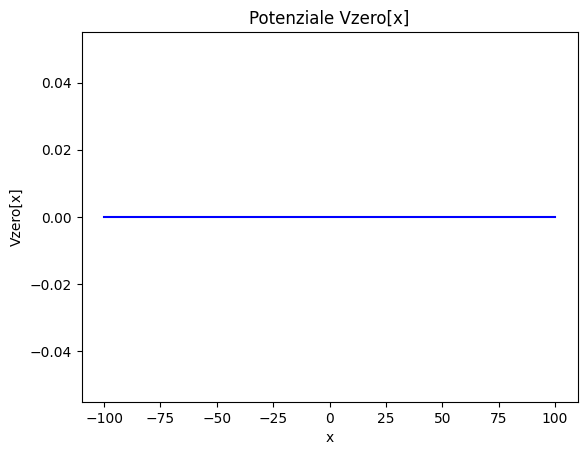

In [15]:
# Visualizzazione del potenziale Vzero[x]
x_range = np.linspace(-100, 100, 1000)  # Range di valori x per il plot
plt.plot(x_range, Vzero(x_range), color='blue')  # Plot del potenziale Vzero[x]
plt.xlabel('x')
plt.ylabel('Vzero[x]')
plt.title('Potenziale Vzero[x]')
plt.show()


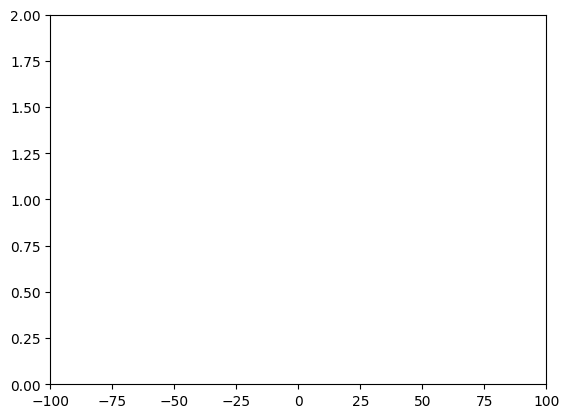

MovieWriter imagemagick unavailable; using Pillow instead.


IndexError: list index out of range

In [25]:


# Definizione della funzione del pacchetto d'onda interpolata
def simulate_wave_packet(x, t):
    # Definisci qui la tua funzione interpolata psiInter0(x, t)
    pass

# Creazione della figura e dell'asse per il plot animato
fig, ax = plt.subplots()
ax.set_xlim(-100, 100)
ax.set_ylim(0, 2)
line, = ax.plot([], [])

# Funzione di inizializzazione
def init():
    line.set_data([], [])
    return line,

# Funzione di aggiornamento per ogni fotogramma dell'animazione
def update(t):
    x = np.linspace(-100, 100, 1000)  # Range di valori x
    y = np.abs(psiInter0(x, t))**2  # Calcolo della funzione psiInter0 e del suo modulo quadro
    line.set_data(x, y)
    return line,

# Creazione dell'animazione
ani = FuncAnimation(fig, update, frames=np.linspace(0, 150, 150), init_func=init, blit=True)

# Visualizzazione dell'animazione
plt.show()


# Visualizzazione dell'animazione
ani.save('wave_packet.gif', writer='imagemagick', fps=60)


MovieWriter imagemagick unavailable; using Pillow instead.


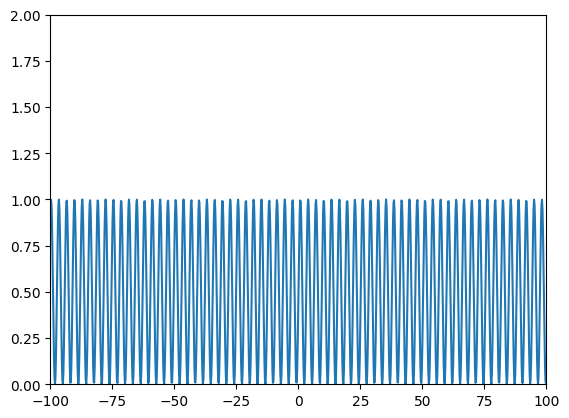

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Definizione della funzione del pacchetto d'onda interpolata
def simulate_wave_packet(x, t):
    # Definisci qui la tua funzione interpolata psiInter0(x, t)
    pass

# Creazione della figura e dell'asse per il plot animato
fig, ax = plt.subplots()
ax.set_xlim(-100, 100)
ax.set_ylim(0, 2)
line, = ax.plot([], [])

# Funzione di inizializzazione
def init():
    line.set_data([], [])
    return line,

# funzione per il pacchetto d'onda interpolato
def psiInter0(x, t):
    # Constants for wave equation
    wave_speed = 1  # Speed of wave propagation
    wave_length = 2 * np.pi  # Wavelength of the wave

    # Wave equation
    y = np.sin((2 * np.pi / wave_length) * (x - wave_speed * t))

    return y

# Funzione di aggiornamento per ogni fotogramma dell'animazione
def update(t):
    x = np.linspace(-100, 100, 1000)  # Range of x values
    y = np.abs(psiInter0(x, t))**2  # Calculate psiInter0 and its square modulus
    line.set_data(x, y)
    return line,

# Creazione dell'animazione
ani = FuncAnimation(fig, update, frames=np.linspace(0, 150, 150), init_func=init, blit=True)

# Visualizzazione dell'animazione
ani.save('wave_packet.gif', writer='imagemagick', fps=60)